In [287]:
# n gives nth phq answer
# 10 gives sum of all phqs
def Yer(y, n):
    return y[:,n-1:n]


contactsStartEnd = [0,1]
twitterStartEnd = [1,5]
textStartEnd = [5,78]
callStartEnd = [78,92]
instagramStartEnd = [92,110]
# gpsStartEnd = [110,113]

audioStartEnd = [110,1693]

allStartEnd = [contactsStartEnd[0], audioStartEnd[1]]


ftypes = ["au","ig","txt","con","tw","call","all"]

# ftype = "au" audio / "ig" instagram / "txt" text / "con" contacts / "tw" twitter / "call" call
# "all" = big matrix
def Xer(X, ftype):
    if(ftype == "au"):
        return X[:,audioStartEnd[0]:audioStartEnd[1]]
    if(ftype == "ig"):
        return X[:,instagramStartEnd[0]:instagramStartEnd[1]]
    if(ftype == "txt"):
        return X[:,textStartEnd[0]:textStartEnd[1]]
    if(ftype == "con"):
        return X[:,contactsStartEnd[0]:contactsStartEnd[1]]
    if(ftype == "tw"):
        return X[:,twitterStartEnd[0]:twitterStartEnd[1]]
    if(ftype == "call"):
        return X[:,callStartEnd[0]:callStartEnd[1]]
#     if(ftype == "gps"):
#         return X[:,gpsStartEnd[0]:gpsStartEnd[1]]
    if(ftype == "all"):
        return X[:,allStartEnd[0]:allStartEnd[1]]
    if(ftype == "audioless"):
        return X[:,allStartEnd[0]:gpsStartEnd[1]]
    if(ftype == "gpsless"):
        return np.hstack((X[:,allStartEnd[0]:instagramStartEnd[1]], X[:,audioStartEnd[0]:audioStartEnd[1]]))    
    
    


## PREPROCESSING

from sklearn import preprocessing
import pandas as pd
import sklearn

mtr = pd.read_csv("mtr1.csv").values
mtr = np.delete(mtr, 0, axis = 1) # because dataframe adds a rogue column
#mtr.shape

## PREPROCESSING
import pandas as pd
from sklearn.preprocessing import Imputer

# shuffle row-wise
np.random.shuffle(mtr)

data = mtr[:,allStartEnd[0]:allStartEnd[1]]
# data = np.hstack((X[:,allStartEnd[0]:instagramStartEnd[1]], X[:,audioStartEnd[0]:audioStartEnd[1]]))


labels = mtr[:,1693:1704]


# replace missing values with mean of their corresponding features
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
data = imp.fit_transform(data)

# If NaNs should be dropped instead:
# mtr = mtr[~np.isnan(mtr).any(axis=1)]

# normalize data (features now have gauss dist., 0 mean and unit variance)
data = sklearn.preprocessing.scale(data)


# THIS IS AN ALTERNATIVE TO 0 MEAN UNIT VARIANCE NORMALIZATION
# do this to scale features to range 0-1
# this must be done if a chi^2 is being performed

# min_max_scaler = preprocessing.MinMaxScaler()
# data = min_max_scaler.fit_transform(data)










# DATA SPLIT (#nosnooping)

# TEST DATA (%15 percent of data)
numofppl_index = mtr.shape[0] - 1
cut_index = int(mtr.shape[0] * 0.85)

test_label = labels[cut_index:numofppl_index,:]
test_data = data[cut_index:numofppl_index,:]

# TRAINING AND VALIDATION DATA (%85 percent of data)

train_label = labels[0:cut_index,:]
train_data = data[0:cut_index,:]

In [331]:
train_label.shape[0]

255

In [329]:
train_label[1] # 15
train_label[2] # 20

array([[ 1.,  1.,  1., ...,  3.,  1., 25.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  2.,  1., 16.],
       ...,
       [ 1.,  0.,  0., ...,  1.,  2., 11.],
       [ 1.,  0.,  0., ...,  0.,  0., 14.],
       [ 1.,  1.,  1., ...,  3.,  3., 25.]])

In [378]:
# balancing for 15

onecounter = 0
onesdata = train_data[0:1,:]
oneslabel = train_label[0:1,1:2]
zerodata = train_data[1:2,:]
zerolabel = train_label[1:2,1:2]

for i in range(0,train_label.shape[0]):
    if(train_label[i:i+1,1:2] == 1):
        onecounter += 1
        onesdata = np.vstack((onesdata, train_data[i:i+1,:]))
        oneslabel = np.vstack((oneslabel, train_label[i:i+1,1:2]))

for i in range(0,train_label.shape[0]):
    if(onecounter == 0):
        break
    if(train_label[i:i+1,1:2] == 0):
        onecounter -= 1
        zerodata = np.vstack((zerodata, train_data[i:i+1,:]))
        zerolabel = np.vstack((zerolabel, train_label[i:i+1,1:2]))
        

train_data_15_bal = np.vstack((onesdata, zerodata))
train_label_15_bal = np.vstack((oneslabel, zerolabel))



In [365]:
# balancing for 20

onecounter = 0
onesdata = train_data[0:1,:]
oneslabel = train_label[0:1,2:3]
zerodata = train_data[1:2,:]
zerolabel = train_label[1:2,2:3]

for i in range(0,train_label.shape[0]):
    if(train_label[i:i+1,2:3] == 1):
        onecounter += 1
        onesdata = np.vstack((onesdata, train_data[i:i+1,:]))
        oneslabel = np.vstack((oneslabel, train_label[i:i+1,2:3]))

for i in range(0,train_label.shape[0]):
    if(onecounter == 0):
        break
    if(train_label[i:i+1,2:3] == 0):
        onecounter -= 1
        zerodata = np.vstack((zerodata, train_data[i:i+1,:]))
        zerolabel = np.vstack((zerolabel, train_label[i:i+1,2:3]))
        

train_data_15_bal = np.vstack((onesdata, zerodata))
train_label_15_bal = np.vstack((oneslabel, zerolabel))



In [383]:
# balancing for 10

onecounter = 0
onesdata = train_data[0:1,:]
oneslabel = train_label[0:1,0:1]
zerodata = train_data[1:2,:]
zerolabel = train_label[1:2,0:1]

for i in range(0,train_label.shape[0]):
    if(train_label[i:i+1,0:1] == 1):
        onecounter += 1
        onesdata = np.vstack((onesdata, train_data[i:i+1,:]))
        oneslabel = np.vstack((oneslabel, train_label[i:i+1,0:1]))

for i in range(0,train_label.shape[0]):
    if(onecounter == 0):
        break
    if(train_label[i:i+1,0:1] == 0):
        onecounter -= 1
        zerodata = np.vstack((zerodata, train_data[i:i+1,:]))
        zerolabel = np.vstack((zerolabel, train_label[i:i+1,0:1]))
        

train_data_15_bal = np.vstack((onesdata, zerodata))
train_label_15_bal = np.vstack((oneslabel, zerolabel))



In [353]:
train_label_15_bal.shape

(152, 1)

In [ ]:
X = Xer(train_data_15_bal, ftypes[i])
y = train_label_15_bal.reshape(255,)

In [288]:
def cutoff(train_label):

    phqcutoffs = [10,15,20]

    for j in range(0,len(phqcutoffs)):
        for i in range(0,train_label[:,9:10].shape[0]):
            if(train_label[i][9] > phqcutoffs[j]):
                train_label[i][j] = 1
            else:
                train_label[i][j] = 0
               
    train_label_x = train_label
        
    return train_label_x               

def YerCutOff(y, cutoff):
    if (cutoff == 10):
        return y[:,0:1]
    if (cutoff == 15):
        return y[:,1:2]
    if (cutoff == 20):
        return y[:,2:3]
    
train_label = cutoff(train_label)

In [367]:
from sklearn.grid_search import GridSearchCV
from sklearn import svm
from sklearn.feature_selection import SelectFromModel

results = np.zeros((2,7))
paras = []

def HyperTunerSVM(trainX,trainy):
    
    ftypes = ["au","ig","txt","con","tw","call","all"] # and "all"
    cutoffs = [15,20]
    for i in range(0,len(ftypes)):
        for j in range(0,len(cutoffs)):
            
#             X = Xer(train_data, ftypes[i])
#             y = YerCutOff(train_label, cutoffs[j]).reshape(255,)
            X = Xer(train_data_15_bal, ftypes[i])
            y = train_label_15_bal.reshape(54,)
            
            c_range = list(range(1, 10))
            parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':c_range}

            svc = svm.SVC()

            grid = GridSearchCV(svc, parameters, cv=2, scoring='accuracy')
            grid.fit(X, y)

            results[j][i] = grid.best_score_
            paras.append(grid.best_estimator_.get_params())


            
HyperTunerSVM(train_data, train_label)

In [368]:
df = pd.DataFrame(results, columns=["au","ig","txt","con","tw","call","all"])

df

,au,ig,txt,con,tw,call,all
0,0.444444,0.5,0.574074,0.481481,0.5,0.611111,0.518519
1,0.444444,0.5,0.574074,0.481481,0.5,0.611111,0.518519


In [385]:
X = Xer(train_data_15_bal,"all")
y = train_label_15_bal.reshape(256,)

c_range = list(range(1, 15))
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':c_range}

svc = svm.SVC()

grid = GridSearchCV(svc, parameters, cv=2, scoring='accuracy')
grid.fit(X, y)


GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [387]:
grid.best_estimator_.get_params()


{'C': 10,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [386]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


grid.grid_scores_
# grid.best_estimator_.get_params()
grid.best_score_
predictions = grid.predict(X)
print(classification_report(y, predictions))
print(confusion_matrix(y, predictions))

             precision    recall  f1-score   support

        0.0       0.76      0.89      0.82       128
        1.0       0.87      0.72      0.79       128

avg / total       0.81      0.80      0.80       256

[[114  14]
 [ 36  92]]


In [364]:
grid.best_estimator_.get_params()


{'C': 3,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [316]:
paras[6]

{'C': 2,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [311]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

results = np.zeros((2,7))
paras = []

def HyperTunerSVM(trainX,trainy):
    
    ftypes = ["au","ig","txt","con","tw","call","all"] # and "all"
    cutoffs = [15,20]
    for i in range(0,len(ftypes)):
        for j in range(0,len(cutoffs)):
            
            X = Xer(train_data, ftypes[i])
            y = YerCutOff(train_label, cutoffs[j]).reshape(255,)
            
            c_range = list(range(1, 10))
            parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':c_range}

            
            min_sample_leaf = list(range(50,52))
            parameters = {'min_samples_leaf': min_sample_leaf}
            
            rfc = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=500, max_features=None, min_samples_leaf=50)

            grid = GridSearchCV(rfc, parameters, cv=2, scoring='accuracy')
            grid.fit(X, y)

            results[j][i] = grid.best_score_
            paras.append(grid.best_estimator_.get_params())


            
HyperTunerSVM(train_data, train_label)

In [312]:
df = pd.DataFrame(results, columns=["au","ig","txt","con","tw","call","all"])

df

,au,ig,txt,con,tw,call,all
0,0.705882,0.705882,0.705882,0.705882,0.705882,0.705882,0.705882
1,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039,0.898039


In [313]:
paras[6]

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [301]:
# clf1 = svm.SVC(C=1, kernel="rbf") #au


In [327]:
clf1 = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=500, max_features=None, min_samples_leaf=50)
clf2 = svm.SVC(C=2, kernel="rbf", probability=True)

np.random.seed(123)
eclf = EnsembleClassifier(clfs=[clf1, clf2], weights=[1,1])

X = Xer(train_data, ftypes[i])
y = YerCutOff(train_label, 20).reshape(255,)

for clf, label in zip([clf1, clf2, eclf], ['randyforst', 'svm classifier', 'Ensemble']):

    scores = cross_validation.cross_val_score(clf, X, y, cv=2, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.90 (+/- 0.00) [randyforst]
Accuracy: 0.90 (+/- 0.00) [svm classifier]
Accuracy: 0.90 (+/- 0.00) [Ensemble]


In [328]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

eclf.fit(X, y)

# grid.grid_scores_
# grid.best_estimator_.get_params()
# grid.best_score_
predictions = eclf.predict(X)
print(classification_report(y, predictions))
# print(confusion_matrix(y, predictions))

             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95       229
        1.0       0.00      0.00      0.00        26

avg / total       0.81      0.90      0.85       255



/home/vape/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [309]:
# 15 CUTOFF ENSEMBLE WEIRD TRY

clf1 = svm.SVC(C=1, kernel="rbf" , probability=True) #au
clf2 = svm.SVC(C=1, kernel="rbf" , probability=True) #ig
clf3 = svm.SVC(C=1, kernel="sigmoid" , probability=True) #txt
clf4 = svm.SVC(C=2, kernel="rbf" , probability=True) # con
clf5 = svm.SVC(C=1, kernel="rbf" , probability=True) # tw
clf6 = svm.SVC(C=1, kernel="rbf", probability=True) # call


eclf = EnsembleClassifier(clfs=[clf1, clf2, clf3, clf4, clf5, clf6], weights=[1,1,1,1,1,1])

scores = []

ftypes = ["au","ig","txt","con","tw","call","all"]
for i in range(0,len(ftypes)):
    X = Xer(train_data, ftypes[i])
    y = YerCutOff(train_label, 15).reshape(255,)

    scores.append(cross_validation.cross_val_score(eclf, X, y, cv=2, scoring='accuracy'))


# for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):

#     scores = cross_validation.cross_val_score(clf, X, y, cv=2, scoring='accuracy')
#     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

In [310]:
scores

[array([0.703125  , 0.70866142]),
 array([0.703125 , 0.7007874]),
 array([0.703125  , 0.70866142]),
 array([0.703125  , 0.70866142]),
 array([0.703125  , 0.70866142]),
 array([0.703125 , 0.7007874]),
 array([0.703125  , 0.70866142])]

In [317]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
import numpy as np
import operator

class EnsembleClassifier(BaseEstimator, ClassifierMixin):
    """
    Ensemble classifier for scikit-learn estimators.

    Parameters
    ----------

    clf : `iterable`
      A list of scikit-learn classifier objects.
    weights : `list` (default: `None`)
      If `None`, the majority rule voting will be applied to the predicted class labels.
        If a list of weights (`float` or `int`) is provided, the averaged raw probabilities (via `predict_proba`)
        will be used to determine the most confident class label.

    """
    def __init__(self, clfs, weights=None):
        self.clfs = clfs
        self.weights = weights

    def fit(self, X, y):
        """
        Fit the scikit-learn estimators.

        Parameters
        ----------

        X : numpy array, shape = [n_samples, n_features]
            Training data
        y : list or numpy array, shape = [n_samples]
            Class labels

        """
        for clf in self.clfs:
            clf.fit(X, y)

    def predict(self, X):
        """
        Parameters
        ----------

        X : numpy array, shape = [n_samples, n_features]

        Returns
        ----------

        maj : list or numpy array, shape = [n_samples]
            Predicted class labels by majority rule

        """

        self.classes_ = np.asarray([clf.predict(X) for clf in self.clfs])
        if self.weights:
            avg = self.predict_proba(X)

            maj = np.apply_along_axis(lambda x: max(enumerate(x), key=operator.itemgetter(1))[0], axis=1, arr=avg)

        else:
            maj = np.asarray([np.argmax(np.bincount(self.classes_[:,c])) for c in range(self.classes_.shape[1])])

        return maj

    def predict_proba(self, X):

        """
        Parameters
        ----------

        X : numpy array, shape = [n_samples, n_features]

        Returns
        ----------

        avg : list or numpy array, shape = [n_samples, n_probabilities]
            Weighted average probability for each class per sample.

        """
        self.probas_ = [clf.predict_proba(X) for clf in self.clfs]
        avg = np.average(self.probas_, axis=0, weights=self.weights)

        return avg

In [ ]:
paras

In [262]:
## CUSTOM CLASSIFIER

from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
import numpy as np
import operator

class Binner(BaseEstimator, ClassifierMixin):

    def __init__(self, regressor):
        self.regressor = regressor

    def fit(self, X, y):
        self.regressor.fit(X, y)
        

    def predict(self, X):
        
        prediction = self.regressor.predict(X)
        
        if (prediction[0] > 15):
            return np.asarray([1])
        else:
            return np.asarray([0])

In [270]:
rdc = RandomForestRegressor(random_state=0, max_features=None)
# rdc.fit(X,y)
X = Xer(train_data, "all")
y = YerCutOff(train_label, 15).reshape(train_label.shape[0],)

bnr = Binner(rdc)
bnr.fit(X,y)
a = bnr.predict(X[0:1,:])
a

array([0])

In [279]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('regr', RandomForestRegressor(random_state=0, max_features=None)),
    ('binner', binner)])
    
def binner

NameError: name 'binner' is not defined

In [272]:
from sklearn import cross_validation


X = Xer(train_data, "all")
y = YerCutOff(train_label, 15).reshape(train_label.shape[0],)

rdc = RandomForestRegressor(random_state=0, max_features=None)
bnr = Binner(rdc)
score = cross_validation.cross_val_score(bnr, X, y, cv=2, scoring='accuracy')

IndexError: too many indices for array

In [281]:
############################ RANDOM FOREST FEATURE SELECTION #############################

from sklearn.ensemble import RandomForestRegressor

X = Xer(train_data, "all")
y = YerCutOff(train_label, 15).reshape(train_label.shape[0],)

# rdc = RandomForestRegressor(max_depth=2, random_state=0)#,max_features=None)
rdc = RandomForestRegressor(random_state=0, max_features=None)

# clf.fit(X, y)

n_estimators = list(range(500,501))
max_features = ["auto","sqrt","log2",0.2,0.4,0.6,0.8,None]
min_sample_leaf = list(range(50,52))
# parameters = {'min_samples_leaf': min_sample_leaf}
max_depth = list(range(50,52))
# parameters = {'min_samples_leaf': min_sample_leaf, 'n_estimators':n_estimators}
parameters = {'min_samples_leaf': min_sample_leaf, 'n_estimators':n_estimators}


grid = GridSearchCV(rdc, parameters, cv=2, scoring='neg_mean_squared_error')
grid.fit(X, y)


GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [50, 51], 'n_estimators': [500]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

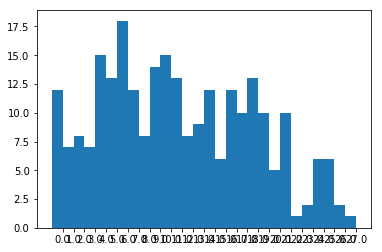

In [196]:
lizz = train_label[:,9:10].tolist()
lizzn = []
for i in range(0,len(lizz)):
    lizzn.append(lizz[i][0])
    
from collections import Counter

Counter(lizzn)


from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


labels, values = zip(*Counter(lizzn).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [142]:

X = Xer(train_data, "all")
y = YerCutOff(train_label, 20).reshape(train_label.shape[0],)

from sklearn.linear_model import RandomizedLasso

rlasso = RandomizedLasso()
rlasso.fit_transform(X, y)

/home/vape/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
/home/vape/.local/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=2.156e-03, with an active set of 13 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/home/vape/.local/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 53 iterations, i.e. alpha=1.078e-03, with an active set of 45 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)

array([], shape=(255, 0), dtype=float64)

In [162]:
rlasso.scores_[0:500]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.075, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

In [166]:
X.shape

(255, 1693)

In [168]:
Xla = np.zeros((255, 1))

for i in range(0,len(rlasso.scores_)):
    if(rlasso.scores_[i] != 0):
        Xla = np.hstack((Xla, X[:,i:i+1]))

In [156]:
Xla = np.delete(Xla, 0, 1)

In [169]:
Xla.shape

(255, 66)

In [177]:
############################ SVC #############################
from sklearn.svm import SVC

svc = SVC(class_weight='balanced')

X = Xer(train_data, "all")
y = YerCutOff(train_label, 20).reshape(train_label.shape[0],)

# parameters = {}

# grid = GridSearchCV(regr, parameters, cv=2, scoring='explained_variance')
# grid.fit(X, y)

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold()
X = sel.fit_transform(X)

parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':list([0.001,0.01,0.1,1,2,3,4,5,6,7,8,10])}


grid = GridSearchCV(svc, parameters, cv=2, scoring='accuracy')
grid.fit(Xla, y)

grid.best_score_

0.8235294117647058

In [178]:
grid.grid_scores_
# grid.best_score_

[mean: 0.76863, std: 0.01870, params: {'C': 0.001, 'kernel': 'linear'},
 mean: 0.50196, std: 0.39413, params: {'C': 0.001, 'kernel': 'rbf'},
 mean: 0.50196, std: 0.39413, params: {'C': 0.001, 'kernel': 'poly'},
 mean: 0.50196, std: 0.39413, params: {'C': 0.001, 'kernel': 'sigmoid'},
 mean: 0.75294, std: 0.01864, params: {'C': 0.01, 'kernel': 'linear'},
 mean: 0.50196, std: 0.39413, params: {'C': 0.01, 'kernel': 'rbf'},
 mean: 0.82353, std: 0.07382, params: {'C': 0.01, 'kernel': 'poly'},
 mean: 0.50196, std: 0.39413, params: {'C': 0.01, 'kernel': 'sigmoid'},
 mean: 0.72157, std: 0.01286, params: {'C': 0.1, 'kernel': 'linear'},
 mean: 0.75686, std: 0.03042, params: {'C': 0.1, 'kernel': 'rbf'},
 mean: 0.77255, std: 0.01479, params: {'C': 0.1, 'kernel': 'poly'},
 mean: 0.76863, std: 0.01870, params: {'C': 0.1, 'kernel': 'sigmoid'},
 mean: 0.72941, std: 0.00286, params: {'C': 1, 'kernel': 'linear'},
 mean: 0.75686, std: 0.01473, params: {'C': 1, 'kernel': 'rbf'},
 mean: 0.76863, std: 0.0187

In [174]:
svc = SVC(class_weight='balanced', C=0.1, kernel='rbf')
parameters = {}

grid = GridSearchCV(svc, parameters, cv=2, scoring='accuracy')
grid.fit(Xla, y)


GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=0.1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [88]:
grid.grid_scores_


[mean: 0.84706, std: 0.05158, params: {}]

In [179]:
from sklearn.metrics import classification_report

predictions = grid.predict(Xla)
print(classification_report(y, predictions))

             precision    recall  f1-score   support

        0.0       0.92      0.82      0.87       228
        1.0       0.20      0.37      0.26        27

avg / total       0.84      0.78      0.80       255



In [114]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(1.05))
Xsel = sel.fit_transform(X)
Xsel.shape

(255, 305)

In [117]:
svc = SVC(class_weight='balanced', C=0.1, kernel='rbf')
parameters = {}

grid = GridSearchCV(svc, parameters, cv=2, scoring='accuracy')
grid.fit(Xsel, y)
grid.grid_scores_

[mean: 0.84706, std: 0.05158, params: {}]

In [119]:
from sklearn.metrics import classification_report

predictions = grid.predict(Xsel)
print(classification_report(y, predictions))

             precision    recall  f1-score   support

        0.0       0.92      0.81      0.86       230
        1.0       0.17      0.36      0.23        25

avg / total       0.85      0.77      0.80       255



In [34]:
liznb.index(max(liznb))
max(liznb)

0.0

In [40]:
# X_new = SelectKBest(chi2, k=100).fit_transform(X, y)
# X_new.shape

parameters = {}

grid = GridSearchCV(svc, parameters, cv=2, scoring='accuracy')
grid.fit(X, y)

grid.best_score_

0.7058823529411765

In [202]:
Xla.shape

(255, 66)

In [197]:
############################ SVR #############################
from sklearn.grid_search import GridSearchCV

from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

X = Xer(train_data, "all")
y = Yer(train_label, 10).reshape(train_label.shape[0],)

svr = SVR()

c_range = [0.001,0.005,0.01,0.1,1,2,3,10]
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':c_range}


grid = GridSearchCV(svr, parameters, cv=2, scoring='neg_mean_squared_error')
grid.fit(Xla, y)

grid.grid_scores_

[mean: -48.36076, std: 4.91629, params: {'C': 0.001, 'kernel': 'linear'},
 mean: -48.48363, std: 5.11873, params: {'C': 0.001, 'kernel': 'rbf'},
 mean: -48.47340, std: 5.10615, params: {'C': 0.001, 'kernel': 'poly'},
 mean: -48.48446, std: 5.11947, params: {'C': 0.001, 'kernel': 'sigmoid'},
 mean: -48.30797, std: 4.56934, params: {'C': 0.005, 'kernel': 'linear'},
 mean: -48.47711, std: 5.11448, params: {'C': 0.005, 'kernel': 'rbf'},
 mean: -48.42917, std: 5.05056, params: {'C': 0.005, 'kernel': 'poly'},
 mean: -48.48173, std: 5.11783, params: {'C': 0.005, 'kernel': 'sigmoid'},
 mean: -48.84453, std: 3.90861, params: {'C': 0.01, 'kernel': 'linear'},
 mean: -48.46927, std: 5.10906, params: {'C': 0.01, 'kernel': 'rbf'},
 mean: -48.36964, std: 4.99038, params: {'C': 0.01, 'kernel': 'poly'},
 mean: -48.47940, std: 5.11517, params: {'C': 0.01, 'kernel': 'sigmoid'},
 mean: -55.87142, std: 2.88155, params: {'C': 0.1, 'kernel': 'linear'},
 mean: -48.33791, std: 5.02517, params: {'C': 0.1, 'kern

In [200]:
grid.best_score_

-48.09352610843258

In [206]:
import sqlite3 as sql
import xml
import xml.dom.minidom

conn = sql.connect('phonedata.db')
c = conn.cursor()

lizt = []
gpsLookup = (1899, "gps")
#for row in c.execute('SELECT DISTINCT* FROM data WHERE id=? AND type=?', gpsLookup):
for row in c.execute('SELECT DISTINCT* FROM data WHERE id=? AND type=?', gpsLookup):
    
#     print row[2]
    lizt.append(row[2])
    
    
#number of different places visited by the user
def numDiff(lizt):
    sum = 0
    for i in range(0, len(lizt)):
        a = lizt[i]
        xmldoc = xml.dom.minidom.parseString(a)
        kml = xmldoc.getElementsByTagName("kml")[0]
        document = kml.getElementsByTagName("Document")[0]
        placemarks = document.getElementsByTagName("Placemark")
        
        for placemark in placemarks:
            desc = placemark.getElementsByTagName("description")[0].firstChild.data
            sum = sum + 1
            
            #print desc
    return sum



numDiff(lizt)

29

NameError: name 'Featurizer' is not defined